In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

from gPhoton import gFind
from gPhoton import gAperture
from gPhoton import gMap
from gPhoton.gphoton_utils import read_lc
import datetime

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [2]:
file = 'III_159A_catalog.dat'
names = ('Star', 'Nobs', 'Smin', 'Smax', 'Smean', 'e_Smean', 'sdS', 'Wmin', 'Wmean', 
         'Date1', 'Date2', 'SName', 'RAdeg DEdeg', 's', 'Bmag', 'Vmag', 'ASCC', 'HIP')
hk = pd.read_table(file, delimiter='|', comment='#', names=names)

radec = hk['RAdeg DEdeg'].str.split(' ', expand=True).loc[:,0:1]
radec.columns = ['RA', 'Dec']

In [3]:
# i = 281 # the star w/ 77 visits in GALEX (HD 4174, symbiotic M giant)

i = 261 # 74 visits (HD 3765)

In [4]:
target = hk['Star'][i]
ra = float(radec['RA'][i][1:])
dec = float(radec['Dec'][i][1:])

step_size = 10. # the time resolution

img_step_size = 30.
img_size = [0.1, 0.1]
phot_rad = 0.0045
ap_in = 0.0050
ap_out = 0.0060

print(target)

HD   3765 


In [5]:
exp_data = gFind(band="NUV", skypos=[ra, dec], exponly=True)

for tstart, tstop in zip(exp_data['NUV']['t0'], exp_data['NUV']['t1']):
        print(tstart, tstop, tstop-tstart)

NUV: 114007.0s (raw) in 74 exposures.
(749646829.995, 749647397.995, 568.0)
(749651677.995, 749653315.995, 1638.0)
(750580904.995, 750582295.995, 1391.0)
(873882164.995, 873883767.995, 1603.0)
(874213366.995, 874214202.995, 836.0)
(874231111.995, 874232816.995, 1705.0)
(874728017.995, 874728517.995, 500.0)
(903965462.995, 903966910.995, 1448.0)
(903971379.995, 903972827.995, 1448.0)
(905592230.995, 905593787.995, 1557.0)
(905609883.995, 905611532.995, 1649.0)
(908934612.995, 908936285.995, 1673.0)
(908993735.995, 908995437.995, 1702.0)
(934810539.995, 934811921.995, 1382.0)
(934899261.995, 934900698.995, 1437.0)
(934988026.995, 934989471.995, 1445.0)
(935071049.995, 935072321.995, 1272.0)
(935165455.995, 935167000.995, 1545.0)
(935248261.995, 935249836.995, 1575.0)
(935337002.995, 935338583.995, 1581.0)
(935413860.995, 935415492.995, 1632.0)
(935508511.995, 935510141.995, 1630.0)
(935591282.995, 935592956.995, 1674.0)
(935680017.995, 935681679.995, 1662.0)
(935762789.995, 935764486.995

In [6]:
(exp_data['NUV']['t0'] - exp_data['NUV']['t0'][0]) / (60.*60.*24.*365.)

array([  0.00000000e+00,   1.53729072e-04,   2.96193239e-02,
         3.93947663e+00,   3.94997898e+00,   3.95054167e+00,
         3.96629845e+00,   4.89341175e+00,   4.89359938e+00,
         4.94499623e+00,   4.94555600e+00,   5.05098246e+00,
         5.05285724e+00,   5.87150273e+00,   5.87431608e+00,
         5.87713080e+00,   5.87976344e+00,   5.88275704e+00,
         5.88538280e+00,   5.88819676e+00,   5.89063391e+00,
         5.89363527e+00,   5.89625993e+00,   5.89907369e+00,
         5.90169838e+00,   5.90488730e+00,   5.90713699e+00,
         5.91013867e+00,   5.91276351e+00,   5.98892095e+00,
         5.99173557e+00,   5.99436111e+00,   5.99698751e+00,
         5.99961396e+00,   6.00242881e+00,   6.00599248e+00,
         6.00880720e+00,   6.01143274e+00,   6.01405971e+00,
         6.01668582e+00,   6.01949937e+00,   6.02212443e+00,
         6.02737595e+00,   6.03018921e+00,   6.03281485e+00,
         6.03544127e+00,   6.03919140e+00,   6.04181710e+00,
         6.10954338e+00,

In [7]:
step_size = 100 # seconds

flux = np.zeros(len(exp_data['NUV']['t0']))

print(datetime.datetime.now())
for k in range(len(exp_data['NUV']['t0'])):
    photon_events = gAperture(band='NUV', skypos=[ra, dec], stepsz=step_size, radius=phot_rad,
                              annulus=[ap_in, ap_out], verbose=3, csvfile=target+ '_' +str(k)+"_lc.csv",
                              trange=[int(exp_data['NUV']['t0'][k]), int(exp_data['NUV']['t1'][k])+1], 
                              overwrite=True)
    data = read_lc(target+ '_' +str(k)+"_lc.csv")
    flux[k] = np.median(data['flux_bgsub'])
    
    print(datetime.datetime.now(), k)

2017-03-03 05:24:23.959074
Using v1.28.2 of gAperture.
Generating a light curve with the following paramters:
 band:    NUV
 skypos:  [10.2042, 40.1888]
 tranges: [749646829, 749647398]
 radius:  0.0045
 annulus: [0.005, 0.006]
 stepsz:  100
 csvfile: HD   3765 _0_lc.csv
 verbose: 3


(datetime.datetime(2017, 3, 3, 5, 25, 45, 9106), 0)
Using v1.28.2 of gAperture.
Generating a light curve with the following paramters:
 band:    NUV
 skypos:  [10.2042, 40.1888]
 tranges: [749651677, 749653316]
 radius:  0.0045
 annulus: [0.005, 0.006]
 stepsz:  100
 csvfile: HD   3765 _1_lc.csv
 verbose: 3
(datetime.datetime(2017, 3, 3, 5, 28, 47, 860218), 1)
Using v1.28.2 of gAperture.
Generating a light curve with the following paramters:
 band:    NUV
 skypos:  [10.2042, 40.1888]
 tranges: [750580904, 750582296]
 radius:  0.0045
 annulus: [0.005, 0.006]
 stepsz:  100
 csvfile: HD   3765 _2_lc.csv
 verbose: 3
(datetime.datetime(2017, 3, 3, 5, 31, 2, 407316), 2)
Using v1.28.2 of gAperture.
Generating a 

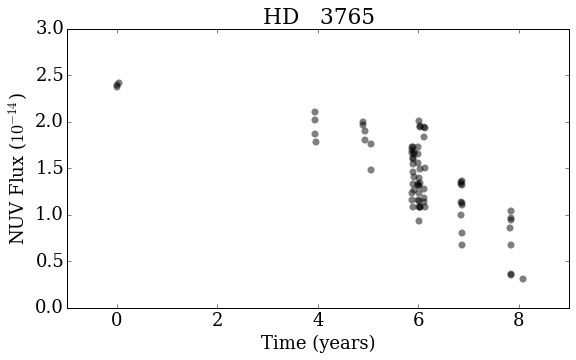

In [31]:
plt.figure(figsize=(9,5))
plt.scatter((exp_data['NUV']['t0'] - exp_data['NUV']['t0'][0]) / (60.*60.*24.*365.), flux/1e-14,
           s=50, alpha=0.5, lw=0, color='k')
plt.xlabel('Time (years)')
plt.ylabel('NUV Flux ($10^{-14}$)')
plt.title(target)

plt.savefig(target+'.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

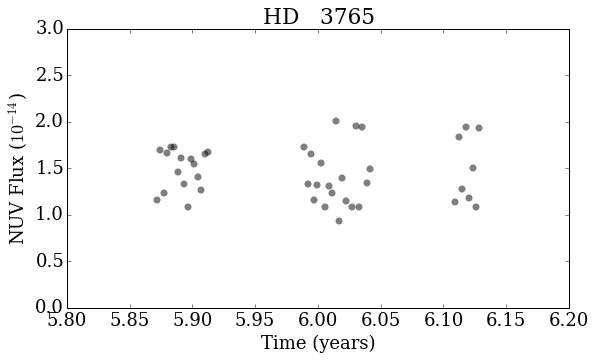

In [34]:
#let's explore just around year 6, big scatter
plt.figure(figsize=(9,5))
plt.scatter((exp_data['NUV']['t0'] - exp_data['NUV']['t0'][0]) / (60.*60.*24.*365.), flux/1e-14,
           s=50, alpha=0.5, lw=0, color='k')
plt.xlabel('Time (years)')
plt.ylabel('NUV Flux ($10^{-14}$)')
plt.xlim(5.8,6.2)
plt.title(target)

# plt.savefig(target+'.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

In [11]:
exp_data['NUV']['t0'][0]

749646829.995

In [9]:
# lets see if the mean flux for each visit is available? (doubt it...)
# would eliminate need for gAperature step for quick-look evolution!
# exp_data2 = gFind(band="both", skypos=[ra, dec])

In [10]:
# exp_data2
# NOPE....